In [6]:
import pandas as pd

In [10]:
# Load dataset
df = pd.read_csv("train.csv", encoding="ISO-8859-1")

# Display first 5 rows
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [12]:
# Check dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [14]:
# Check missing values
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')


In [20]:
df = df.drop(columns=['Row ID', 'Postal Code'], errors='ignore')


In [22]:
df.fillna(0, inplace=True)  # Replace missing values with 0


In [24]:
print(df.info())  # Check data types & null values
print(df.describe())  # Summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Region         9800 non-null   object        
 11  Product ID     9800 non-null   object        
 12  Category       9800 non-null   object        
 13  Sub-Category   9800 non-null   object        
 14  Product Name   9800 non-null   object        
 15  Sales          9800 n

In [26]:
print(f"Duplicate Rows: {df.duplicated().sum()}")
df = df.drop_duplicates()


Duplicate Rows: 1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Ensure seaborn is also imported if you're using it


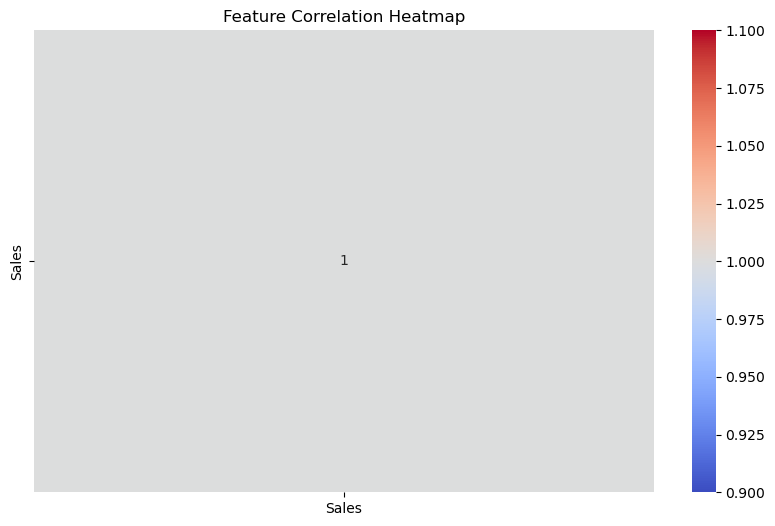

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

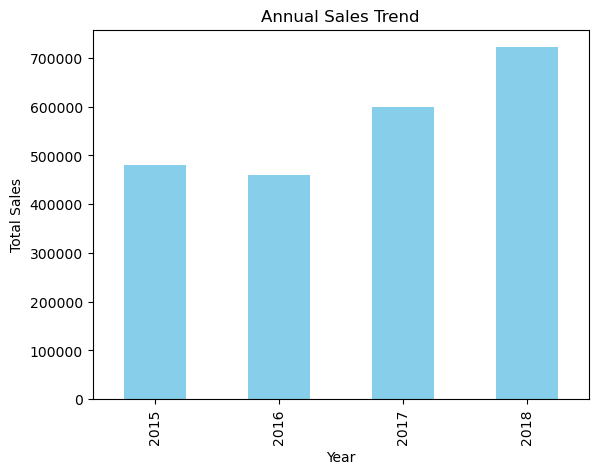

In [35]:

df.groupby(df['Order Date'].dt.year)['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title("Annual Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()


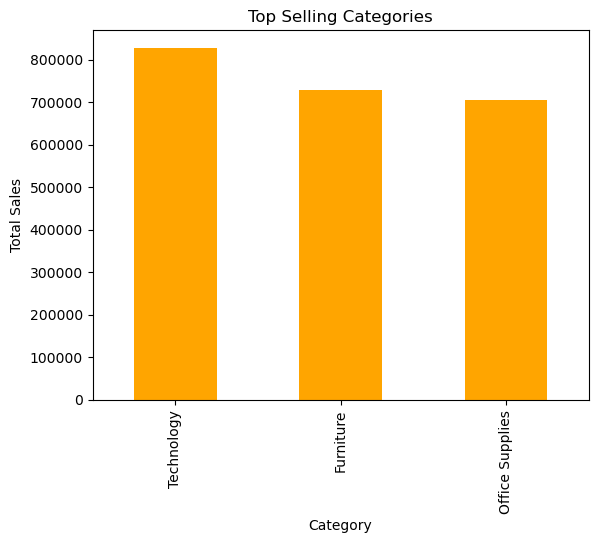

In [37]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Top Selling Categories")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


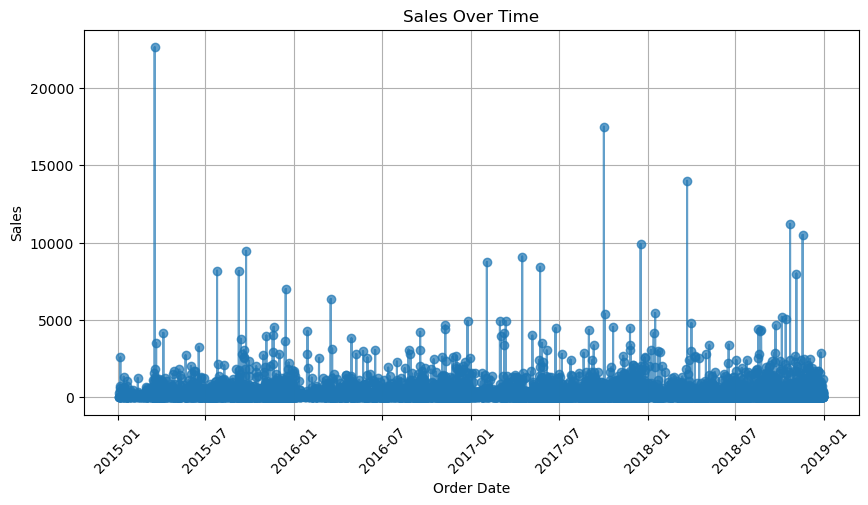

In [43]:
# Convert 'Order Date' to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)

# Sort by date
df = df.sort_values("Order Date")

# Plot Sales Over Time
plt.figure(figsize=(10, 5))
plt.plot(df["Order Date"], df["Sales"], marker="o", linestyle="-", alpha=0.7)
plt.title("Sales Over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_22504\3653649255.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x="Category", y="Sales", palette="viridis")


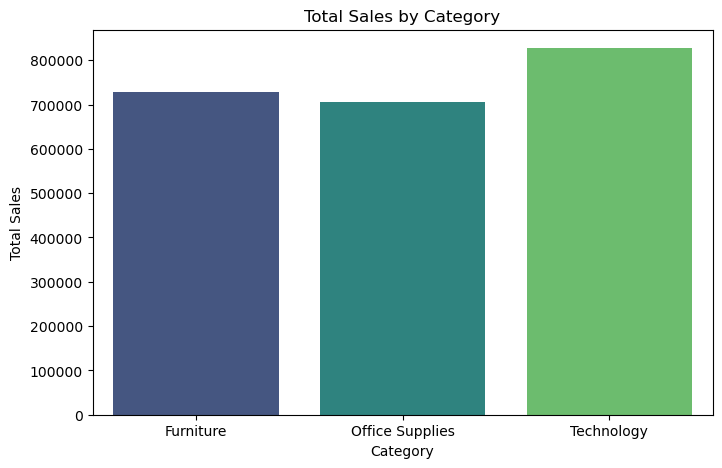

In [45]:
import seaborn as sns

# Group by 'Category' and sum sales
category_sales = df.groupby("Category")["Sales"].sum().reset_index()

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales, x="Category", y="Sales", palette="viridis")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_22504\1400354916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x="Region", y="Sales", palette="coolwarm")


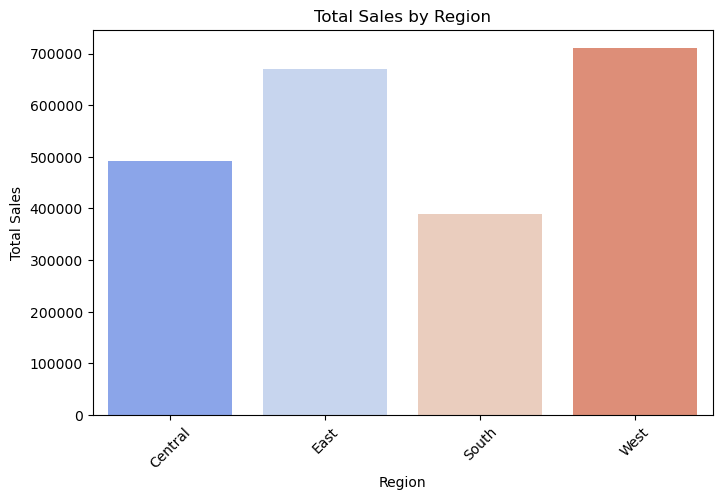

In [47]:
# Group by 'Region' and sum Sales
region_sales = df.groupby("Region")["Sales"].sum().reset_index()

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=region_sales, x="Region", y="Sales", palette="coolwarm")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_22504\1125892523.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_count, x="Region", y="Unique Customers", palette="Blues_r")


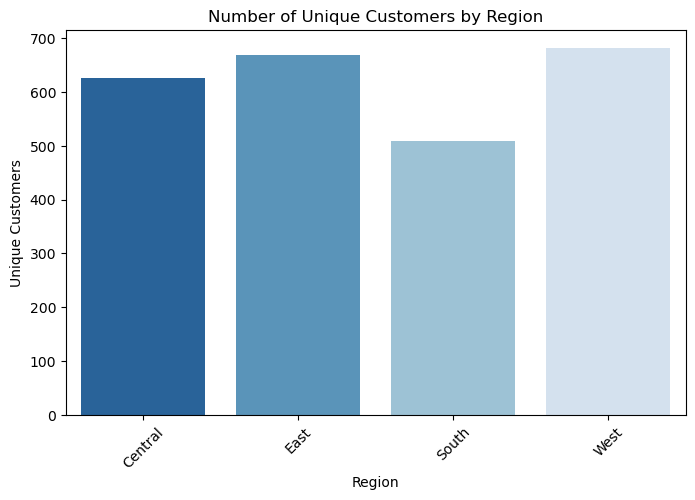

In [51]:
customer_count = df.groupby("Region")["Customer ID"].nunique().reset_index()
customer_count.columns = ["Region", "Unique Customers"]

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=customer_count, x="Region", y="Unique Customers", palette="Blues_r")
plt.title("Number of Unique Customers by Region")
plt.xlabel("Region")
plt.ylabel("Unique Customers")
plt.xticks(rotation=45)
plt.show()


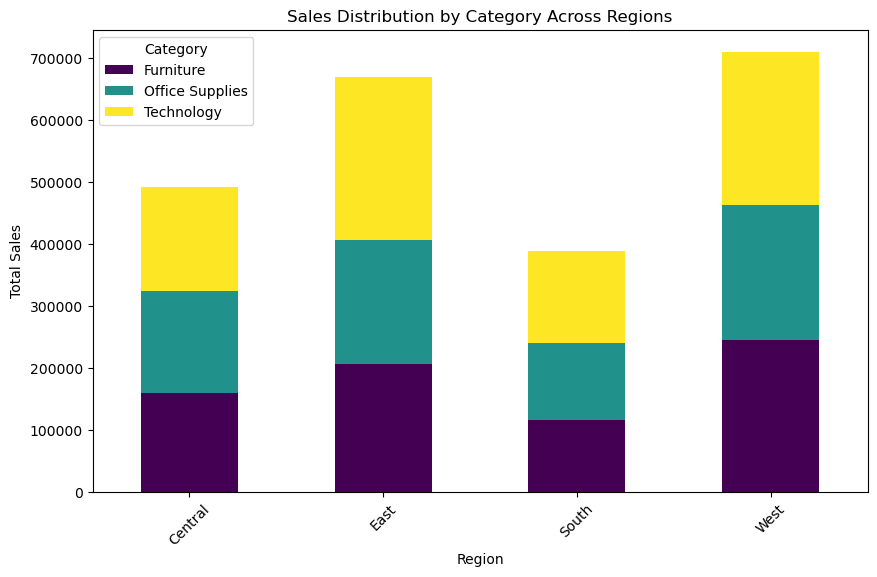

In [53]:
# Group by Region & Category to get total sales
region_category_sales = df.groupby(["Region", "Category"])["Sales"].sum().reset_index()

# Pivot the data for a stacked bar chart
pivot_data = region_category_sales.pivot(index="Region", columns="Category", values="Sales")

# Stacked bar plot
pivot_data.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Sales Distribution by Category Across Regions")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.legend(title="Category")
plt.xticks(rotation=45)
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_22504\4015437697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_category, x="Category", y="Unique Customers", palette="Blues_r")


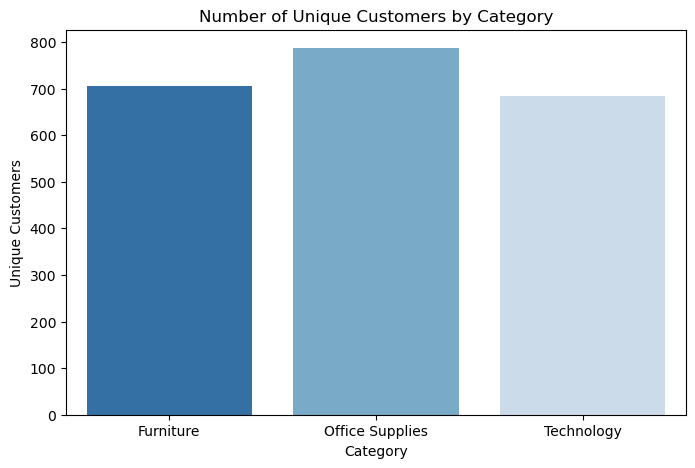

In [55]:
# Count unique customers per category
customer_category = df.groupby("Category")["Customer ID"].nunique().reset_index()
customer_category.columns = ["Category", "Unique Customers"]

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=customer_category, x="Category", y="Unique Customers", palette="Blues_r")
plt.title("Number of Unique Customers by Category")
plt.xlabel("Category")
plt.ylabel("Unique Customers")
plt.show()

In [57]:
customer_categories = df.groupby("Customer ID")["Category"].nunique().reset_index()
customer_categories.columns = ["Customer ID", "Unique Categories"]

# View customers who purchased from multiple categories
switching_customers = customer_categories[customer_categories["Unique Categories"] > 1]
print(switching_customers.head(10))

  Customer ID  Unique Categories
0    AA-10315                  3
1    AA-10375                  3
2    AA-10480                  3
3    AA-10645                  3
4    AB-10015                  3
5    AB-10060                  3
6    AB-10105                  3
7    AB-10150                  3
8    AB-10165                  3
9    AB-10255                  3


In [59]:
# Convert Order Date to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Sort purchases by date
df_sorted = df.sort_values(["Customer ID", "Order Date"])

# Find the first and last category for each customer
customer_first_last = df_sorted.groupby("Customer ID").agg(
    First_Category=("Category", "first"),
    Last_Category=("Category", "last"),
    Total_Purchases=("Category", "count")
).reset_index()

# Customers who switched categories
switchers = customer_first_last[customer_first_last["First_Category"] != customer_first_last["Last_Category"]]

print(switchers.head(10))


   Customer ID   First_Category    Last_Category  Total_Purchases
2     AA-10480        Furniture  Office Supplies               12
3     AA-10645       Technology  Office Supplies               18
4     AB-10015  Office Supplies       Technology                6
5     AB-10060  Office Supplies        Furniture               18
6     AB-10105  Office Supplies        Furniture               20
7     AB-10150       Technology        Furniture               12
8     AB-10165        Furniture  Office Supplies               14
9     AB-10255  Office Supplies       Technology               14
10    AB-10600  Office Supplies       Technology                8
11    AC-10420        Furniture  Office Supplies                5


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categories numerically
encoder = LabelEncoder()
df["Category"] = encoder.fit_transform(df["Category"])

# Aggregate features for each customer
customer_features = df.groupby("Customer ID").agg(
    Total_Spend=("Sales", "sum"),
    Order_Count=("Category", "count"),
    Last_Category=("Category", "last"),
    Unique_Categories=("Category", "nunique")
).reset_index()

# Target: If customer purchased from multiple categories (1 = switcher, 0 = non-switcher)
customer_features["Switched"] = (customer_features["Unique_Categories"] > 1).astype(int)

# Features & target
X = customer_features[["Total_Spend", "Order_Count", "Last_Category"]]
y = customer_features["Switched"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict probability of switching
customer_features["Switch_Probability"] = model.predict_proba(X)[:, 1]


In [62]:
# Find customers most likely to switch
high_risk_customers = customer_features[customer_features["Switch_Probability"] > 0.7]

print(high_risk_customers[["Customer ID", "Switch_Probability"]].head(10))


  Customer ID  Switch_Probability
0    AA-10315                 1.0
1    AA-10375                 1.0
2    AA-10480                 1.0
3    AA-10645                 1.0
4    AB-10015                 1.0
5    AB-10060                 1.0
6    AB-10105                 1.0
7    AB-10150                 1.0
8    AB-10165                 1.0
9    AB-10255                 1.0


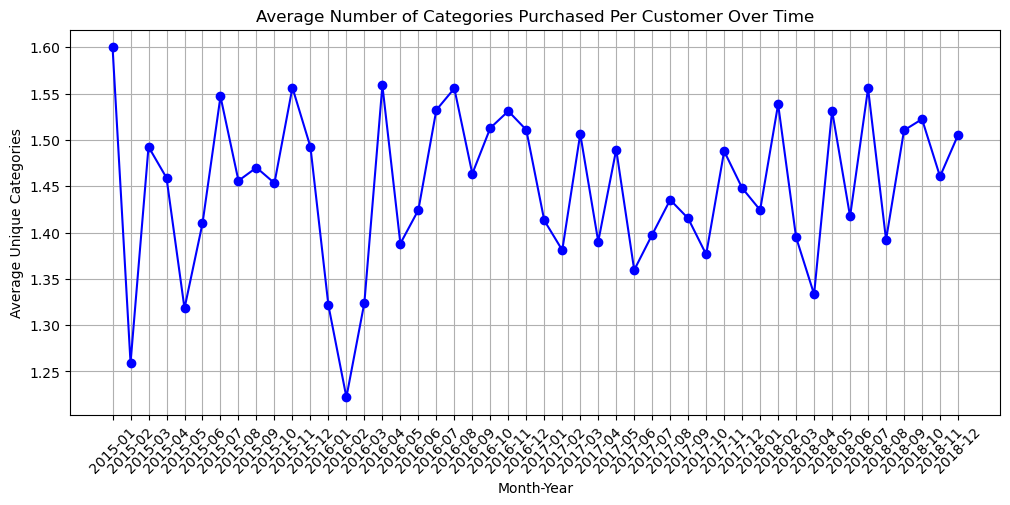

In [65]:
# Extract Year and Month from Order Date
df["YearMonth"] = df["Order Date"].dt.to_period("M")

# Count unique categories per customer per month
category_trends = df.groupby(["Customer ID", "YearMonth"])["Category"].nunique().reset_index()

# Average unique categories per month (trend analysis)
monthly_trend = category_trends.groupby("YearMonth")["Category"].mean()

# Plot category switching trend over time
plt.figure(figsize=(12, 5))
plt.plot(monthly_trend.index.astype(str), monthly_trend, marker="o", linestyle="-", color="b")
plt.xticks(rotation=45)
plt.title("Average Number of Categories Purchased Per Customer Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Average Unique Categories")
plt.grid()
plt.show()


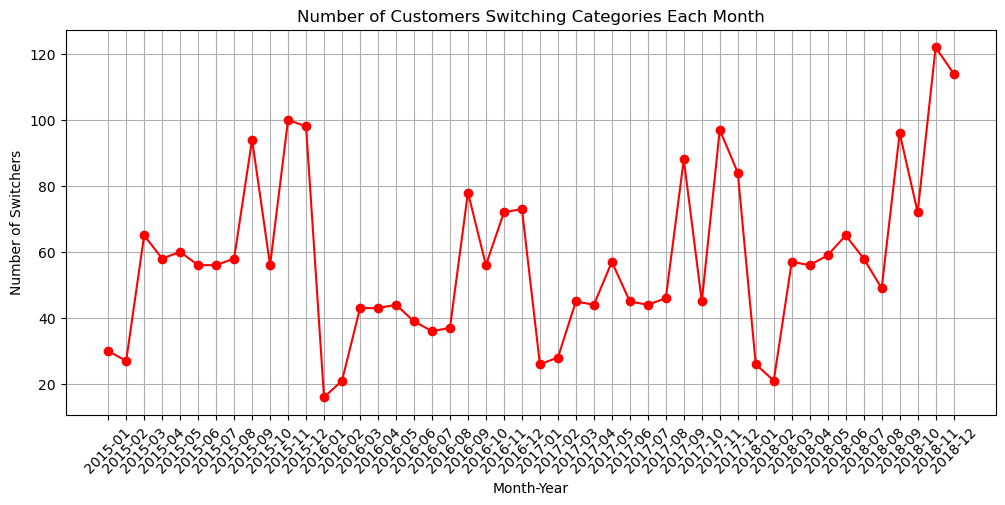

In [67]:
# Identify customers who switched categories month-over-month
category_trends["Previous Month Categories"] = category_trends.groupby("Customer ID")["Category"].shift(1)

# If current month's categories ≠ previous month's, mark as switcher (1), else (0)
category_trends["Switched"] = (category_trends["Category"] != category_trends["Previous Month Categories"]).astype(int)

# Count switching customers per month
monthly_switchers = category_trends.groupby("YearMonth")["Switched"].sum()

# Plot customer switching trends
plt.figure(figsize=(12, 5))
plt.plot(monthly_switchers.index.astype(str), monthly_switchers, marker="o", linestyle="-", color="r")
plt.xticks(rotation=45)
plt.title("Number of Customers Switching Categories Each Month")
plt.xlabel("Month-Year")
plt.ylabel("Number of Switchers")
plt.grid()
plt.show()


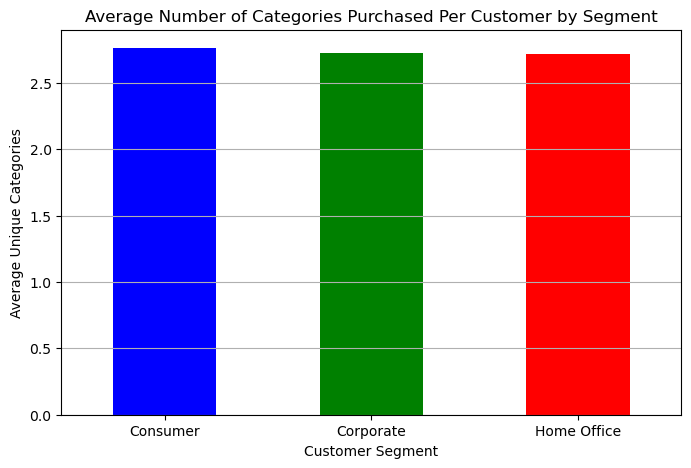

In [69]:
# Merge segment info
customer_segments = df.groupby("Customer ID").agg(
    Segment=("Segment", "first"),  # First segment for each customer
    Unique_Categories=("Category", "nunique"),
    Total_Spend=("Sales", "sum")
).reset_index()

# Calculate switching probability per segment
segment_switching = customer_segments.groupby("Segment")["Unique_Categories"].mean()

# Plot
plt.figure(figsize=(8, 5))
segment_switching.plot(kind="bar", color=["blue", "green", "red"])
plt.title("Average Number of Categories Purchased Per Customer by Segment")
plt.ylabel("Average Unique Categories")
plt.xlabel("Customer Segment")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()



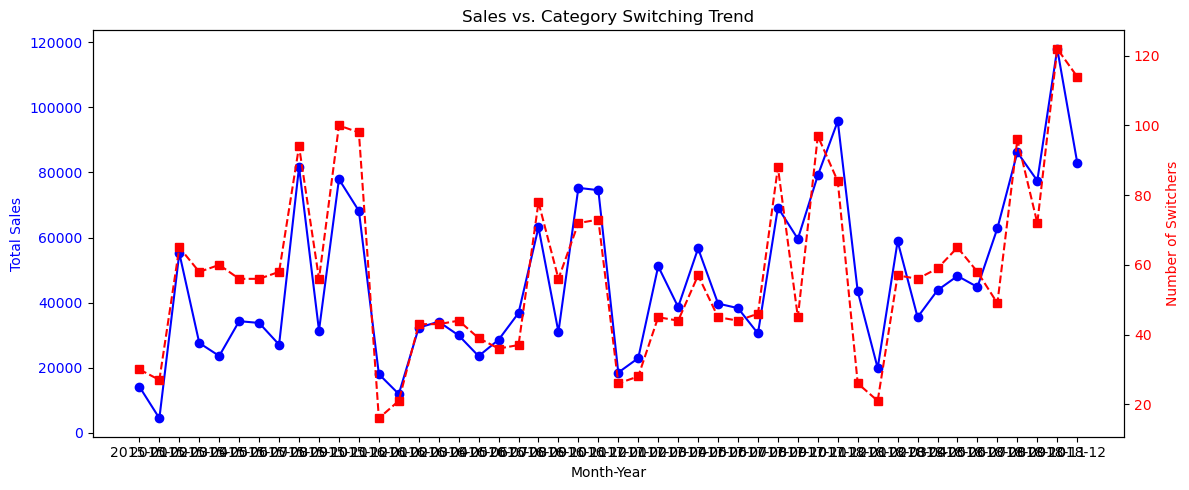

In [71]:
# Group by Year-Month and sum total Sales
monthly_sales = df.groupby("YearMonth")["Sales"].sum()

# Combine with switching trends
sales_switching_trend = monthly_sales.to_frame().merge(monthly_switchers, on="YearMonth")

# Plot sales vs. switching trends
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.set_xlabel("Month-Year")
ax1.set_ylabel("Total Sales", color="blue")
ax1.plot(sales_switching_trend.index.astype(str), sales_switching_trend["Sales"], marker="o", linestyle="-", color="blue", label="Total Sales")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Number of Switchers", color="red")
ax2.plot(sales_switching_trend.index.astype(str), sales_switching_trend["Switched"], marker="s", linestyle="--", color="red", label="Switchers")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Sales vs. Category Switching Trend")
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()


In [73]:
df.to_csv("cleaned_train.csv", index=False)
print("✅ Data processing completed! File saved as 'cleaned_train.csv'")


✅ Data processing completed! File saved as 'cleaned_train.csv'
